# Bike Sharing Assignment

## Table of Contents

1. [Problem Statement](#problem-statement)
2. [Importing Libraries](#importing-all-the-libraries-and-enabling-common-settings)
3. [Common Functions](#common-functions)
4. [Data Understanding](#data-understanding)
    1. [Importing Data](#importing-data)
    2. [Data Info](#data-info)
5. [EDA](#eda)
    1. [Univariate Analysis](#univariate-analysis)
    2. [Bi-Variate Analysis](#bi-variate-analysis)
6. [Pre-Processing](#pre-processing)
    1. [Drop Unwanted Columns](#drop-unwanted-columns)
    2. [Map Columns to Original Values](#map-columns-to-original-values)
    3. [Dummy Variable Creation](#dummy-variable-creation)
    4. [Train-Test Split](#train-test-split)
    5. [Rescaling](#rescaling)
7. [Feature Selection & Modelling](#feature-selection--modelling)
    1. [RFE](#rfe)
    2. [Model 1](#model-1)
    3. [Model 2](#model-2)
    4. [Model 3](#model-3)
    5. [Model 4](#model-4)
8. [Model Evaluation](#model-evaluation)
    1. [Error Terms Histogram](#error-terms-histogram)
    2. [R2 Score](#r2-score)
9. [Final Result](#final-result)
    


## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Importing all the libraries and enabling common settings

In [33]:
import numpy as np # math library
import pandas as pd # to work with datasets
import matplotlib.pyplot as plt # used for plotting simple 2D graphs
import seaborn as sns # visualization library based on matplotlib
import re # library to work on string manipulation
import warnings # library to show warning messages

import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

from sklearn.model_selection import train_test_split # used for splitting the dataframe into training and testing dataframes
from sklearn.preprocessing import MinMaxScaler # used for scaling the values
from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.linear_model import LinearRegression # Linear regression
from statsmodels.stats.outliers_influence import variance_inflation_factor # Used for VIF
import statsmodels.api as sm # statsmodel
from sklearn.metrics import r2_score # Used for R square value


# pandas settings
# pd.options.display.float_format = '{:.6f}'.format # sometimes numbers can show up in scientific format. using this option will show numbers in flot format with 2 decimals
pd.options.display.max_columns = None # remove limitations on number of columns

# we can ignore warnings that arise because of versions
warnings.filterwarnings('ignore')
input_file = 'day.csv'

## Common Functions

In [34]:
def plot_cat_column(df,column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=df)
    plt.show()

def calculate_vif(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

def lr_model(target_varible_df, df, ignore_cols):
    X_train = df[df.columns[~df.columns.isin(ignore_cols)]]
    X_train_sm = sm.add_constant(X_train)
    lr = sm.OLS(target_varible_df, X_train_sm).fit()
    print(lr.summary()) # linear regression summary 
    return lr, X_train

## Data Understanding

### Importing Data

In [35]:
bike_df = pd.read_csv(input_file) # reading the input loan csv file
bike_df.head() # checking the initial 5 rows

# Observations:
# data seems to have got imported without any errors

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [36]:
# renaming yr and mnth column for better readibility
bike_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
bike_df.head()


,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Info

In [37]:
print(bike_df.shape) #shows the column and row count
print(bike_df.info(verbose = True,show_counts = True)) # shows not null counts and data type of all columns
bike_df.describe(include='all') # provided summary statistics of all columns
print(bike_df.drop_duplicates().shape)

# Observations:
# Dataset contains 730 rows and 16 columns 
# Except dteday all are of either integer or float data type
# Although some of these integer/float data type columns look like categorical columns
# None of the columns have missing values
# There are no duplicates in the dataset

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
(730, 16)


## EDA

### Univariate Analysis

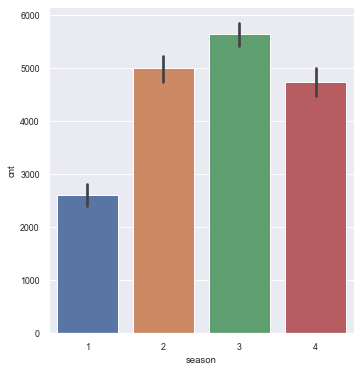

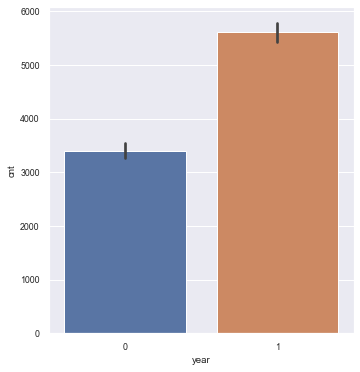

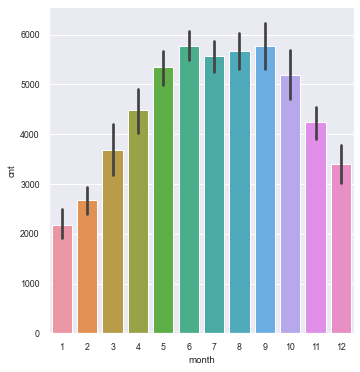

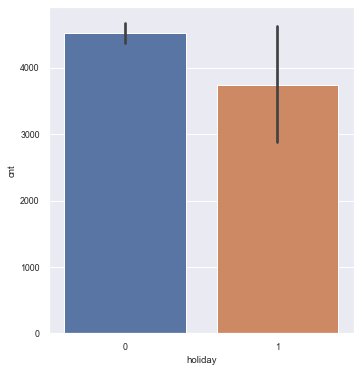

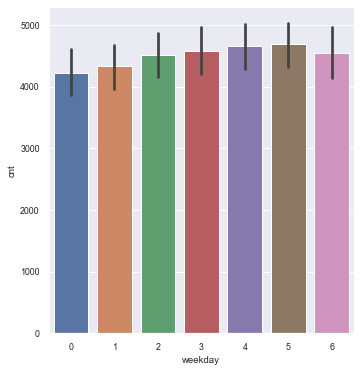

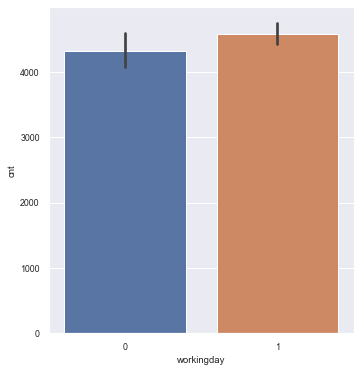

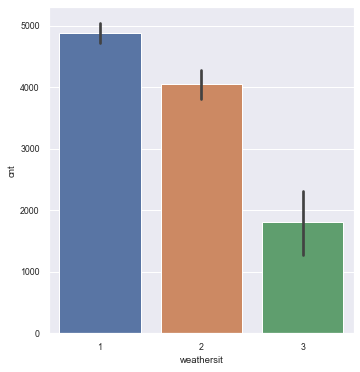

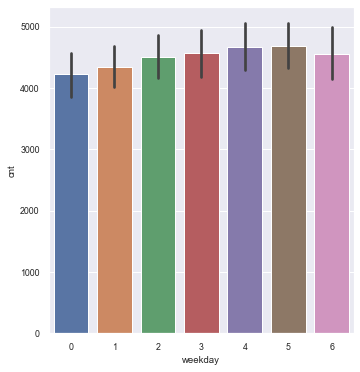

In [38]:
plot_cat_column(bike_df,'season')
plot_cat_column(bike_df,'year')
plot_cat_column(bike_df,'month')
plot_cat_column(bike_df,'holiday')
plot_cat_column(bike_df,'weekday')
plot_cat_column(bike_df,'workingday')
plot_cat_column(bike_df,'weathersit')
plot_cat_column(bike_df,'weekday')



# Observations
# fall Season has more bookings
# year 2019 has more bookings than 2018
# bookings are higher in the middle of the year
# bookings are more during non-holidays
# weathersit - when 1 i.e clear there are more bookings
# not much of variation across weekday


## Bi-variate Analysis

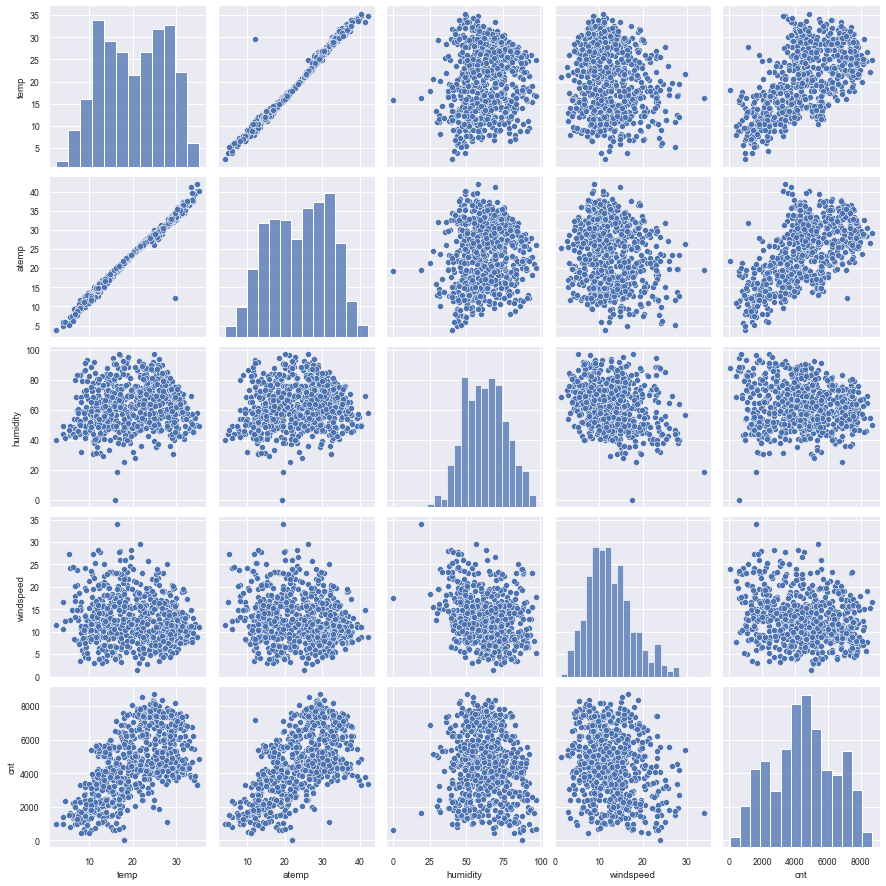

In [39]:
sns.pairplot(data=bike_df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

# Observations
# temp and atemp looks highly correlated - lets see in correation chart 
# temp and atemp their relationship with cnt can be plotted as a straight line - R2 maynot be that great though 
# humidity & windspeed are scattered alot 

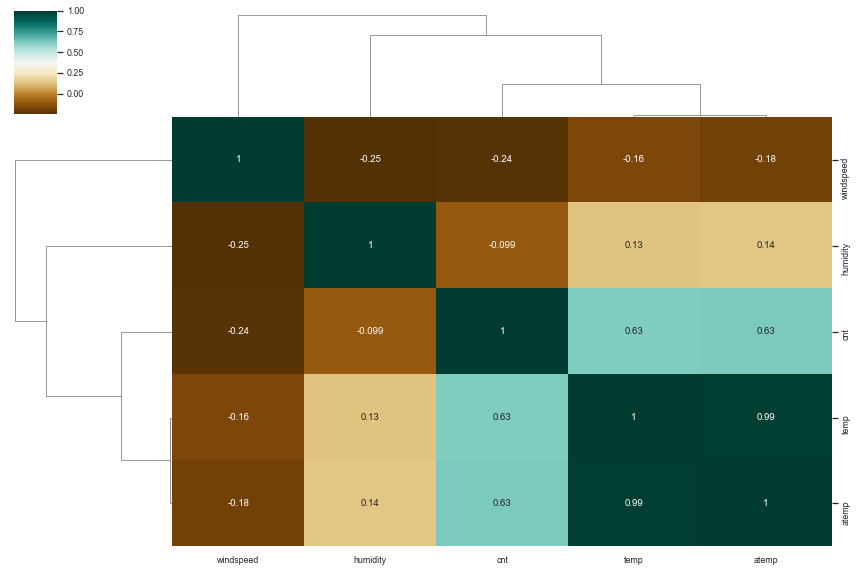

In [40]:
bike_df_correlation = bike_df[['temp','atemp','humidity','windspeed','cnt']].corr()
sns.set(font_scale=0.8)
sns.clustermap(bike_df_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

# Observations
# atemp and temp are highly correlated - we can ignore one column based on p values further in the solution

## Pre-Processing

### Drop Unwanted Columns

In [41]:

# instant is index column, so can be ignored
# Model doesnt allow date feature - since month and year are already provided we can drop the dteday column
# casual and registered seems to be irrelevant as cnt is the summation of these columns

bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)


### Map Columns To Original Values

In [42]:
bike_df.month = bike_df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_df.weathersit = bike_df.weathersit.map({1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'})
bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
print(bike_df.info(verbose = True,show_counts = True)) # shows not null counts and data type of all columns
bike_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB
None


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variable Creation

In [43]:
# Creation of dummy variables

months_df=pd.get_dummies(bike_df.month,drop_first=True)
weekdays_df=pd.get_dummies(bike_df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_df.season,drop_first=True)

bike_df = pd.concat([bike_df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
bike_df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
print(bike_df.info(verbose = True,show_counts = True)) # shows not null counts and data type of all columns
bike_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


### Train-Test Split

In [44]:
# Train test split - 70-30
df_train, df_test = train_test_split(bike_df, train_size = 0.70, random_state = 42)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling 

In [45]:
# Rescaling the features
scaler = MinMaxScaler()
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
print(df_train.describe())
df_train.head()

             year     holiday  workingday        temp       atemp    humidity  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.519608    0.027451    0.668627    0.551313    0.526919    0.654203   
std      0.500106    0.163554    0.471169    0.227237    0.212992    0.143788   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.354526    0.354454    0.544033   
50%      1.000000    0.000000    1.000000    0.575824    0.564951    0.660798   
75%      1.000000    0.000000    1.000000    0.745338    0.698389    0.756977   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt         aug         dec         feb         jan  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.415045    0.497429    0.074510    0.074510    0.074510    0.088235   
std      0.185760    0.2342

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0.439696,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


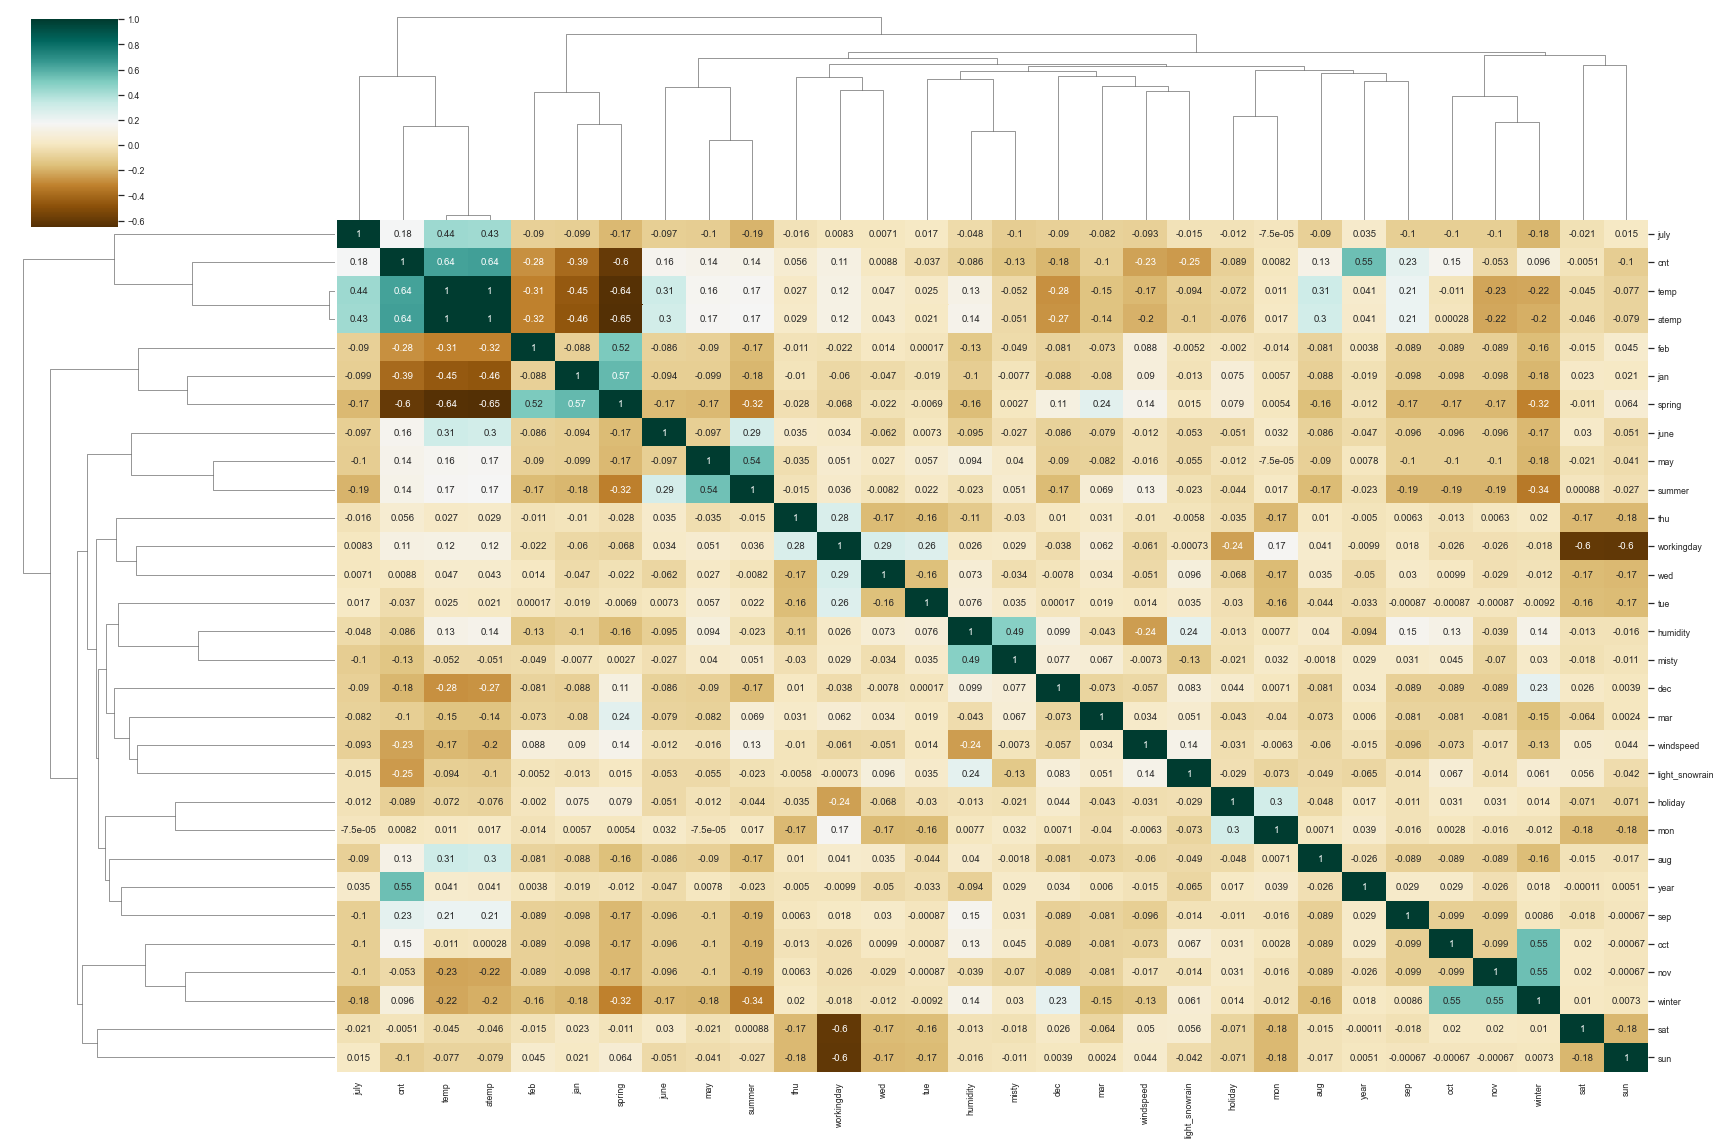

In [46]:
df_train_corr = df_train.corr()
sns.set(font_scale=0.8)
sns.clustermap(df_train_corr,annot=True,figsize=(24, 16),cmap="BrBG")
plt.show()

# Observations
# atemp and temp are highly correlated
# winter, oct and nov show correlation
# summer, may show correlation
# spring, jan and feb show correlation
# year and cnt show correlation
# cnt, temp and atemp show correlation
# humidity and misty show correlation


In [47]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0.439696,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


## Feature Selection & Modelling

### RFE

In [48]:
df_train_copy = df_train.copy()

y_train = df_train_copy.pop('cnt')
X_train = df_train_copy

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')


,Predictor,Select Status,Ranking
0,year,True,1
26,spring,True,1
25,misty,True,1
24,light_snowrain,True,1
19,sat,True,1
17,sep,True,1
15,nov,True,1
13,mar,True,1
11,july,True,1
28,winter,True,1


### Model 1

In [49]:
X_train_rfe_df = X_train[X_train.columns[rfe.support_]]

lr_1,X_train_lr_1 = lr_model(y_train,X_train_rfe_df,[])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.07e-184
Time:                        16:44:27   Log-Likelihood:                 482.58
No. Observations:                 510   AIC:                            -933.2
Df Residuals:                     494   BIC:                            -865.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3283      0.037      8.

### Model 2

In [50]:
# Remove temp as it has p-value 0.927
lr_2,X_train_lr_2 = lr_model(y_train,X_train_rfe_df,['temp'])


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          7.79e-186
Time:                        16:44:27   Log-Likelihood:                 482.57
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     495   BIC:                            -871.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3282      0.037      8.

### Model 3

In [51]:
# Remove sat as it has p-value 0.134

lr_3,X_train_lr_3 = lr_model(y_train,X_train_rfe_df,['temp','sat'])


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.66e-186
Time:                        16:44:27   Log-Likelihood:                 481.42
No. Observations:                 510   AIC:                            -934.8
Df Residuals:                     496   BIC:                            -875.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3328      0.037      9.

In [52]:
# All p-values are below 0.05 lets check the vif 

calculate_vif(X_train_lr_3)

,Features,VIF
0,humidity,24.79
1,atemp,17.35
2,windspeed,4.99
3,spring,2.72
4,winter,2.69
5,misty,2.25
6,year,2.09
7,nov,1.82
8,july,1.48
9,dec,1.37


### Model 4

In [53]:
# lets remove humidity 
lr_4,X_train_lr_4 = lr_model(y_train,X_train_rfe_df,['temp','sat','humidity'])


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.8
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          5.38e-184
Time:                        16:44:27   Log-Likelihood:                 472.67
No. Observations:                 510   AIC:                            -919.3
Df Residuals:                     497   BIC:                            -864.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2365      0.029      8.

In [54]:
# vif looks better now - we dont have to remove additional columns
calculate_vif(X_train_lr_4)

,Features,VIF
0,atemp,5.34
1,windspeed,4.94
2,winter,2.36
3,year,2.08
4,spring,1.79
5,nov,1.77
6,misty,1.57
7,july,1.43
8,dec,1.33
9,sep,1.23


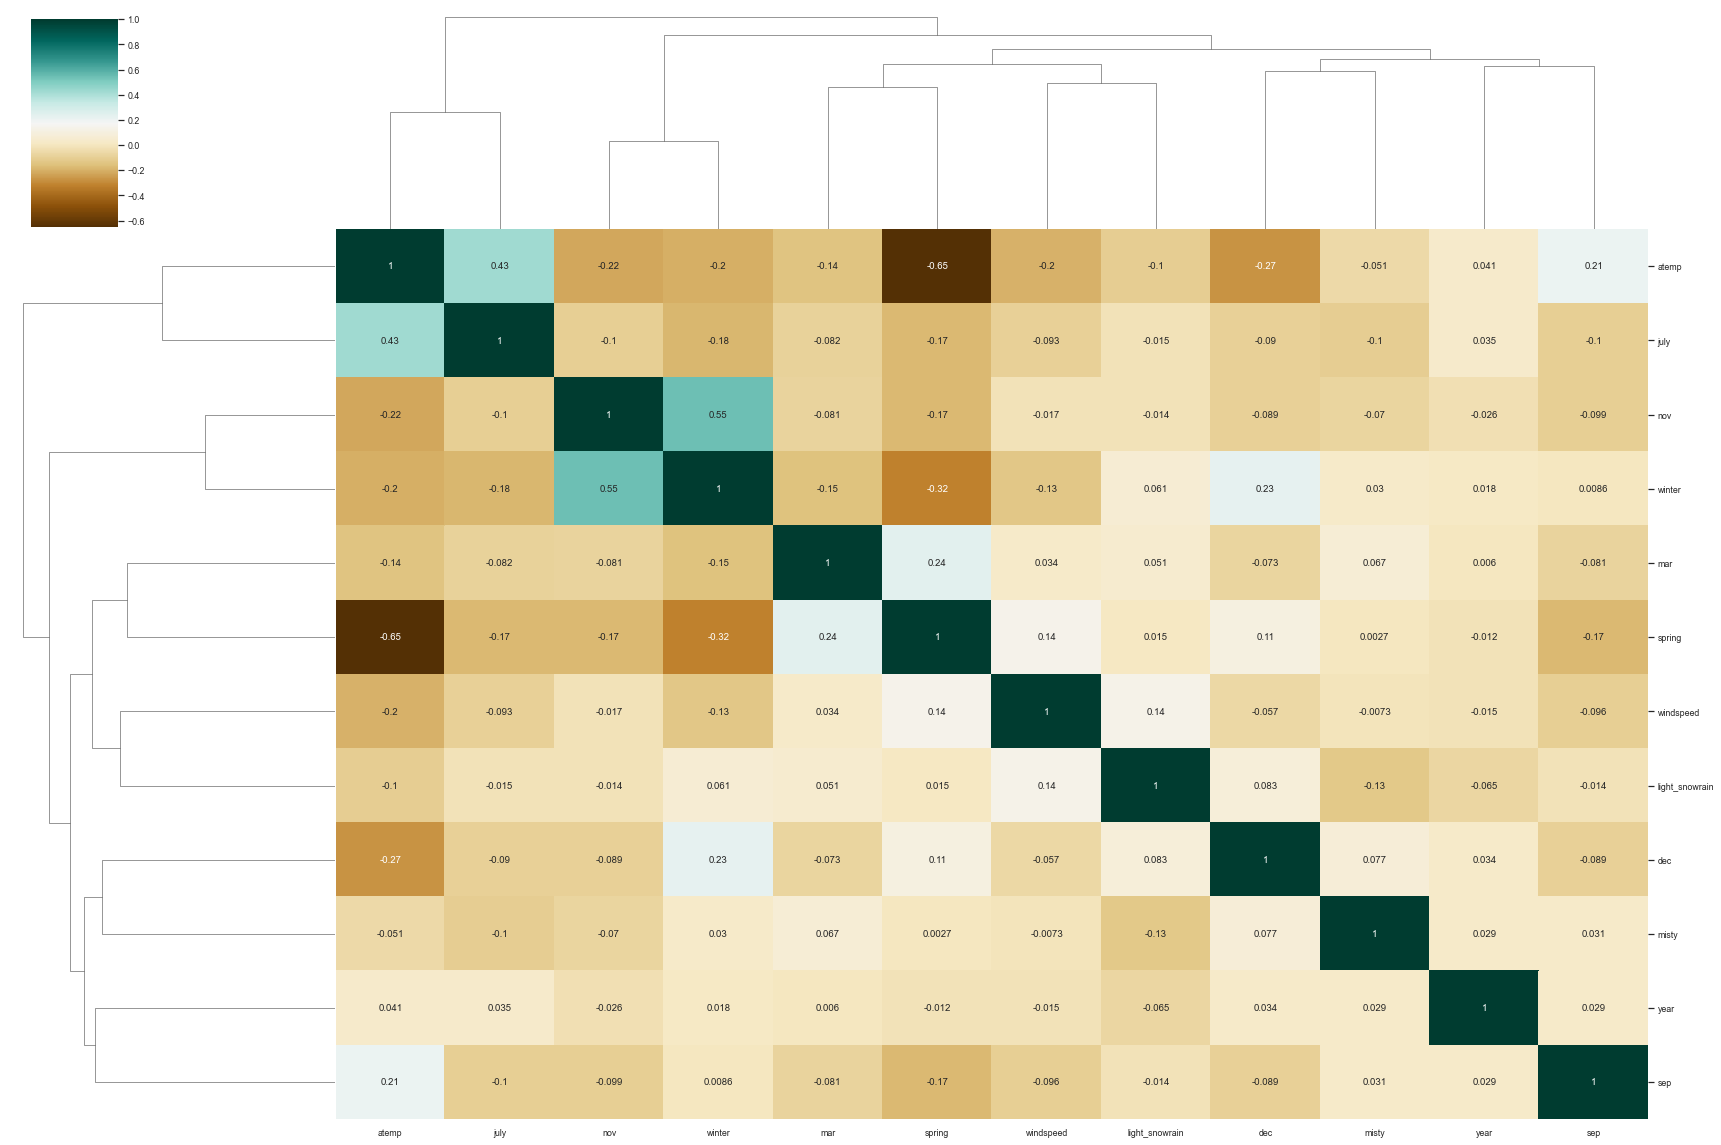

In [55]:
X_train_new_corr = X_train_lr_4.corr()
sns.set(font_scale=0.8)
sns.clustermap(X_train_new_corr,annot=True,figsize=(24, 16),cmap="BrBG")
plt.show()

# Observations:
# Dont see any two variables highligh correlated - parameters looks good 

In [56]:
X_train_lr_4.columns

Index(['year', 'atemp', 'windspeed', 'dec', 'july', 'mar', 'nov', 'sep',
       'light_snowrain', 'misty', 'spring', 'winter'],
      dtype='object')

In [57]:
lr_4.params

const             0.236468
year              0.241595
atemp             0.441830
windspeed        -0.081500
dec              -0.068584
july             -0.053022
mar               0.054613
nov              -0.085300
sep               0.049708
light_snowrain   -0.265918
misty            -0.084282
spring           -0.162485
winter            0.083225
dtype: float64

## Model Evaluation

We can consider the model lr_4 as all the pvalues among the predictor variables is less than 0.05 and the VIF of all features is also under control.

In [58]:
y_train_pred = lr_4.predict(sm.add_constant(X_train_lr_4))


### Error Terms Histogram

Text(0.5, 0, 'Errors')

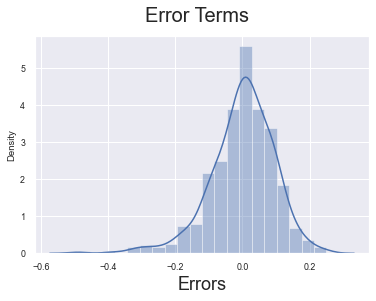

In [59]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [60]:
X_train_lr_4

,year,atemp,windspeed,dec,july,mar,nov,sep,light_snowrain,misty,spring,winter
645,1,0.404998,0.419004,0,0,0,0,0,0,1,0,1
163,0,0.685963,0.708724,0,0,0,0,0,0,0,0,0
360,0,0.326273,0.415925,1,0,0,0,0,0,1,1,0
640,1,0.682653,0.110593,0,0,0,0,0,0,1,0,1
625,1,0.637937,0.839562,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0.395131,0.621696,0,0,1,0,0,0,0,1,0
106,0,0.481247,0.704080,0,0,0,0,0,0,0,0,0
270,0,0.651183,0.316186,0,0,0,0,1,0,1,0,1
435,1,0.499487,0.464173,0,0,1,0,0,0,0,1,0


In [61]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0.526017,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
355,0,0,1,0.453814,0.455552,0.780592,0.062325,0.318363,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


### R2 Score

In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test = X_test[X_train_lr_4.columns]

# Adding constant variable to test dataframe
X_test_lr_4 = sm.add_constant(X_test)

y_pred = lr_4.predict(X_test_lr_4)

r2 = round(r2_score(y_test, y_pred),4)
r2

0.8126

Text(0, 0.5, 'y_pred')

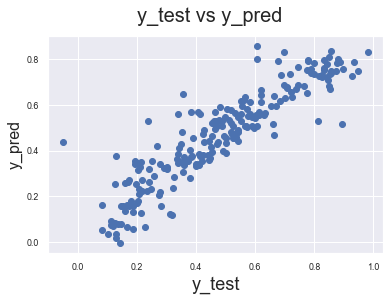

In [63]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [64]:
round(lr_4.params,4)

const             0.2365
year              0.2416
atemp             0.4418
windspeed        -0.0815
dec              -0.0686
july             -0.0530
mar               0.0546
nov              -0.0853
sep               0.0497
light_snowrain   -0.2659
misty            -0.0843
spring           -0.1625
winter            0.0832
dtype: float64

In [65]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8017


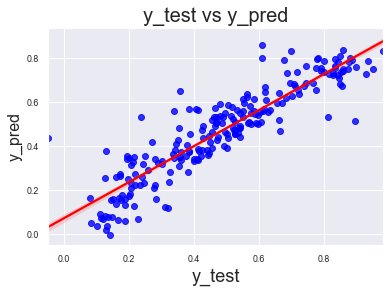

In [66]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Final Result

Final Predictor Variables:
- year
- atemp	
- windspeed	
- dec	
- july	
- mar	
- nov	
- sep	
- light_snowrain	
- misty	
- spring	
- winter

Train R^2           = 0.832

Train Adjusted R^2  = 0.828

Test R^2           = 0.812

Test Adjusted R^2  = 0.802 